1.) Point cloud import

The import based on the general info file which was generated by preprocessing step. The input file contained the following: filename, platform, tree type code, shape of the tree, scanposition, cx,cy,cz

Importing example datasets related to generated datasets via LiDAR Simulation Tool (HELIOS https://github.com/nlukac/helios-FWF).
Output file structure is the following: [x,y,z,intensity,echowidth,returnNumber,returnNumPerPulse,FWFIndex,objectId].


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

workdir='/home/komazsofi/Munka/Heidelberg/DAAD_helios_sim/Run2_wground_20161228/'
treemodell='PN1'

general_data=pd.read_csv(workdir+'sim_result_treeinfo.txt',sep=',',names=['filename','platform','treemodellid','shape','scanposition','cx','cy','cz'])
general_data=general_data[(general_data['treemodellid']==treemodell)]

als=general_data[(general_data['platform']=='ALS')]
tls=general_data[(general_data['platform']=='TLS')]
mls=general_data[(general_data['platform']=='MLS')]
uls=general_data[(general_data['platform']=='ULS')]

als_data=pd.read_csv(workdir+als['filename'].values[0],sep=' ',names=['x','y','NormalizedZ','intensity','echowidth','returnNumber','returnNumPerPulse','FWFIndex','objectId'])
tls_data=pd.read_csv(workdir+tls['filename'].values[0],sep=' ',names=['x','y','NormalizedZ','intensity','echowidth','returnNumber','returnNumPerPulse','FWFIndex','objectId'])
mls_data=pd.read_csv(workdir+mls['filename'].values[0],sep=' ',names=['x','y','NormalizedZ','intensity','echowidth','returnNumber','returnNumPerPulse','FWFIndex','objectId'])
uls_data=pd.read_csv(workdir+uls['filename'].values[0],sep=' ',names=['x','y','NormalizedZ','intensity','echowidth','returnNumber','returnNumPerPulse','FWFIndex','objectId'])


2.) Filter

In [5]:
als_data['NormalizedZ_perc']=(100*als_data.NormalizedZ)/np.max(als_data.NormalizedZ)
tls_data['NormalizedZ_perc']=(100*tls_data.NormalizedZ)/np.max(tls_data.NormalizedZ)
mls_data['NormalizedZ_perc']=(100*mls_data.NormalizedZ)/np.max(mls_data.NormalizedZ)
uls_data['NormalizedZ_perc']=(100*uls_data.NormalizedZ)/np.max(uls_data.NormalizedZ)

ground_als_data=als_data[(als_data['objectId']==0)]
nonground_als_data=als_data[(als_data['objectId']==1)]

ground_tls_data=tls_data[(tls_data['objectId']==0)]
nonground_tls_data=tls_data[(tls_data['objectId']==1)]

ground_mls_data=mls_data[(mls_data['objectId']==0)]
nonground_mls_data=mls_data[(mls_data['objectId']==1)]

ground_uls_data=uls_data[(uls_data['objectId']==0)]
nonground_uls_data=uls_data[(uls_data['objectId']==1)]


3.) Estimation of the subset type geometrical features and export into a txt file for further analysis

In [6]:
def nofp_per_eq(nonground_sim_data):
    h=""
    nofp_tototal=""
    nofp_first_tototal=""
    nofp_single_tototal=""
    nofp_multi_tototal=""
    
    for i in range(0,100,10):
        
        h_s=i+10
        h+="%f," % (h_s)

        nofp_tototal_s=np.float(nonground_sim_data[(nonground_sim_data['NormalizedZ_perc']>i) & (nonground_sim_data['NormalizedZ_perc']<i+10)].shape[0])/np.float(nonground_sim_data['NormalizedZ_perc'].shape[0])
        nofp_tototal+="%f," % (nofp_tototal_s*100)

        nofp_first_tototal_s=np.float(nonground_sim_data[(nonground_sim_data['returnNumber']==1) & (nonground_sim_data['NormalizedZ_perc']>i) & (nonground_sim_data['NormalizedZ_perc']<i+10)].shape[0])/np.float(nonground_sim_data['NormalizedZ_perc'].shape[0])
        nofp_first_tototal+="%f," % (nofp_first_tototal_s*100)
        
        nofp_single_tototal_s=np.float(nonground_sim_data[(nonground_sim_data['returnNumPerPulse']==1) & (nonground_sim_data['NormalizedZ_perc']>i) & (nonground_sim_data['NormalizedZ_perc']<i+10)].shape[0])/np.float(nonground_sim_data['NormalizedZ_perc'].shape[0])
        nofp_single_tototal+="%f," % (nofp_single_tototal_s*100)
        
        nofp_multi_tototal_s=np.float(nonground_sim_data[(nonground_sim_data['returnNumPerPulse']>1) & (nonground_sim_data['NormalizedZ_perc']>i) & (nonground_sim_data['NormalizedZ_perc']<i+10)].shape[0])/np.float(nonground_sim_data['NormalizedZ_perc'].shape[0])
        nofp_multi_tototal+="%f," % (nofp_multi_tototal_s*100)
        
    return h,nofp_tototal,nofp_first_tototal,nofp_single_tototal,nofp_multi_tototal
    
h_als,nofp_tototal_als,nofp_first_tototal_als,nofp_single_tototal_als,nofp_multi_tototal_als=nofp_per_eq(nonground_als_data)
h_tls,nofp_tototal_tls,nofp_first_tototal_tls,nofp_single_tototal_tls,nofp_multi_tototal_tls=nofp_per_eq(nonground_tls_data)
h_mls,nofp_tototal_mls,nofp_first_tototal_mls,nofp_single_tototal_mls,nofp_multi_tototal_mls=nofp_per_eq(nonground_mls_data)
h_uls,nofp_tototal_uls,nofp_first_tototal_uls,nofp_single_tototal_uls,nofp_multi_tototal_uls=nofp_per_eq(nonground_uls_data)

print h_als
print nofp_tototal_als
print nofp_first_tototal_als
print nofp_single_tototal_als
print nofp_multi_tototal_als

output_fea_sub = "%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % (als.values[0,0],als.values[0,1],als.values[0,2],als.values[0,3],als.values[0,4],h_als,nofp_tototal_als,nofp_first_tototal_als,nofp_single_tototal_als,nofp_multi_tototal_als
                                                                                                   ,tls.values[0,0],tls.values[0,1],tls.values[0,2],tls.values[0,3],tls.values[0,4],h_tls,nofp_tototal_tls,nofp_first_tototal_tls,nofp_single_tototal_tls,nofp_multi_tototal_tls
                                                                                                   ,mls.values[0,0],mls.values[0,1],mls.values[0,2],mls.values[0,3],tls.values[0,4],h_mls,nofp_tototal_mls,nofp_first_tototal_mls,nofp_single_tototal_mls,nofp_multi_tototal_mls
                                                                                                   ,uls.values[0,0],uls.values[0,1],uls.values[0,2],uls.values[0,3],uls.values[0,4],h_uls,nofp_tototal_uls,nofp_first_tototal_uls,nofp_single_tototal_uls,nofp_multi_tototal_uls)

print output_fea_sub

fileout = file(workdir+treemodell+'with_sub_geomfea_n.txt', "w")
fileout.write(output_fea_sub)
fileout.close()

10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,
0.000000,0.000000,0.000000,13.802817,33.239437,20.845070,19.154930,8.732394,2.535211,1.408451,
0.000000,0.000000,0.000000,11.267606,25.915493,16.901408,17.464789,7.323944,2.535211,1.126761,
0.000000,0.000000,0.000000,10.704225,23.098592,14.366197,11.830986,5.070423,1.690141,0.845070,
0.000000,0.000000,0.000000,3.098592,10.140845,6.478873,7.323944,3.661972,0.845070,0.563380,
ALS_PN1leg000_points.xyz,ALS,PN1,conical,0,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,,0.000000,0.000000,0.000000,13.802817,33.239437,20.845070,19.154930,8.732394,2.535211,1.408451,,0.000000,0.000000,0.000000,11.267606,25.915493,16.901408,17.464789,7.323944,2.535211,1.126761,,0.000000,0.000000,0.000000,10.704225,23.098592,14.366197,11.830986,5.070423,1.690141,0.845070,,0.000000,0.000000,0.000000,3.098592,10.140845,6.478873,7.323944,3.661972,0.845070,0.563380,

In [7]:
perc_data=pd.read_csv(workdir+treemodell+'with_sub_geomfea_n.txt',sep=',',names=['platform','treemodellid','shape','scanposition','h10',
                                                                              'h20','h30','h40','h50','h60','h70','h80','h90','h100','nan1',
                                                                               'h10_tot','h20_tot','h30_tot','h40_tot','h50_tot','h60_tot','h70_tot','h80_tot','h90_tot','h100_tot','nan2',
                                                                               'h10_f_tot','h20_f_tot','h30_f_tot','h40_f_tot','h50_f_tot','h60_f_tot','h70_f_tot','h80_f_tot','h90_f_tot','h100_f_tot','nan3',
                                                                               'h10_s_tot','h20_s_tot','h30_s_tot','h40_s_tot','h50_s_tot','h60_s_tot','h70_s_tot','h80_s_tot','h90_s_tot','h100_s_tot','nan4',
                                                                               'h10_m_tot','h20_m_tot','h30_m_tot','h40_m_tot','h50_m_tot','h60_m_tot','h70_m_tot','h80_m_tot','h90_m_tot','h100_m_tot','nan5'])

#print perc_data

perc_data_mod=perc_data[['h10','h20','h30','h40','h50','h60','h70','h80','h90','h100']].T
perc_data_mod_y=perc_data[['h10_tot','h20_tot','h30_tot','h40_tot','h50_tot','h60_tot','h70_tot','h80_tot','h90_tot','h100_tot']].T
perc_data_mod_y2=perc_data[['h10_f_tot','h20_f_tot','h30_f_tot','h40_f_tot','h50_f_tot','h60_f_tot','h70_f_tot','h80_f_tot','h90_f_tot','h100_f_tot']].T
perc_data_mod_y3=perc_data[['h10_s_tot','h20_s_tot','h30_s_tot','h40_s_tot','h50_s_tot','h60_s_tot','h70_s_tot','h80_s_tot','h90_s_tot','h100_s_tot']].T

filename_als=perc_data.index[0]
filename_tls=perc_data.index[1]
filename_mls=perc_data.index[2]
filename_uls=perc_data.index[3]


4.) Exploration analysis

a.) Synchronized vertical profile (percentiles together with 2D representation of the point cloud and one figure together just the percentiles per different platforms)

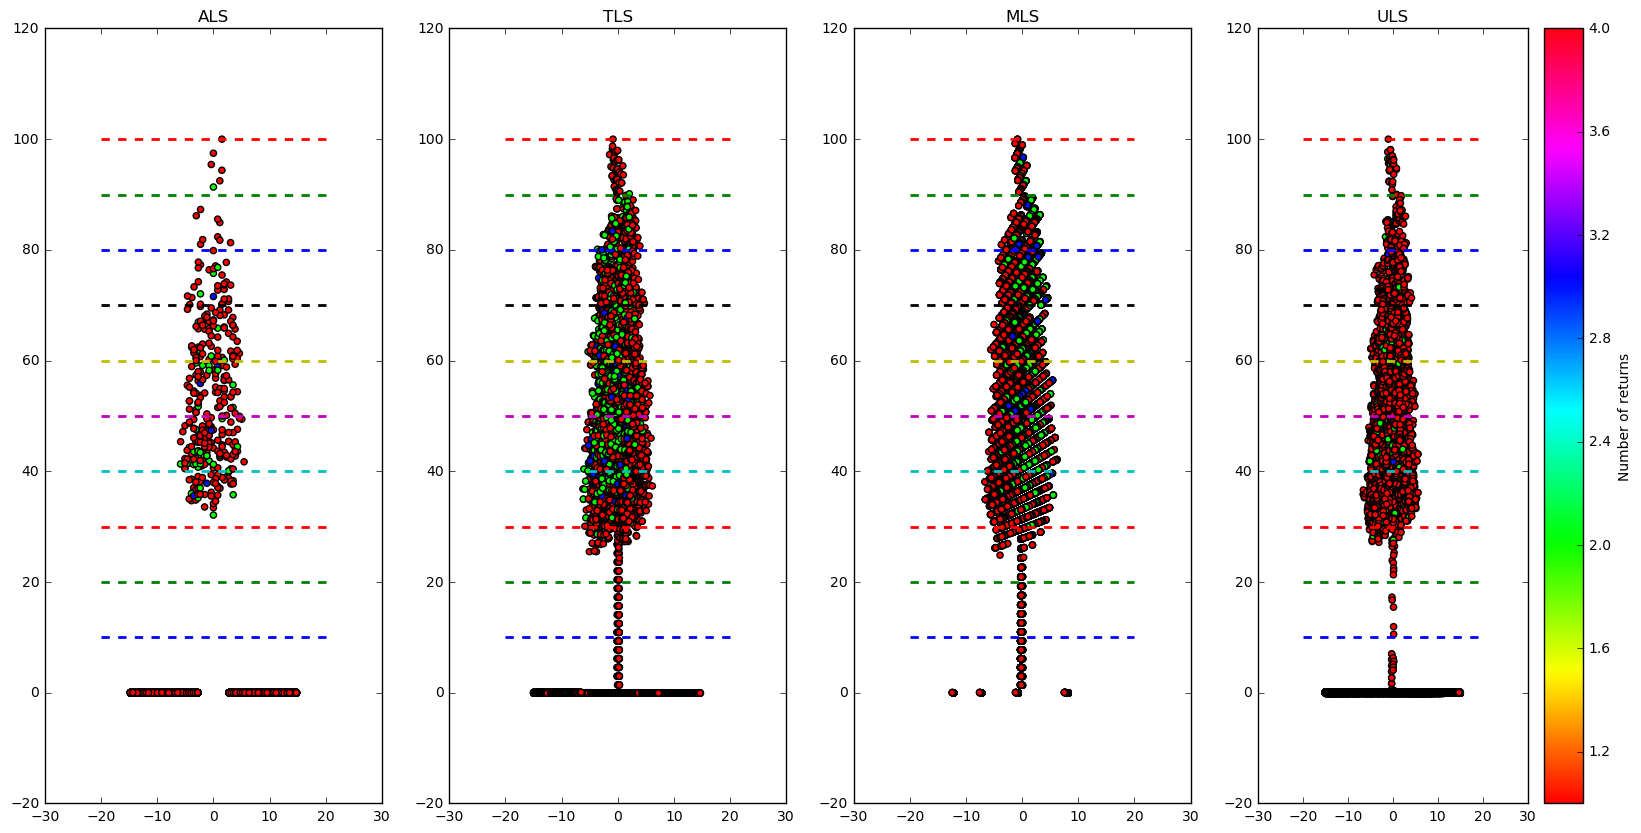

In [8]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.scatter(als_data['x'].values,als_data['NormalizedZ_perc'].values, 
            c=als_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax1.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_als].values,perc_data_mod[filename_als].values),'--',linewidth=2)

ax2.scatter(tls_data['x'].values,tls_data['NormalizedZ_perc'].values, 
            c=tls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax2.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_tls].values,perc_data_mod[filename_tls].values),'--',linewidth=2)

ax3.scatter(mls_data['x'].values,mls_data['NormalizedZ_perc'].values, 
            c=mls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax3.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_mls].values,perc_data_mod[filename_mls].values),'--',linewidth=2)

ax4.scatter(uls_data['x'].values,uls_data['NormalizedZ_perc'].values, 
            c=uls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax4.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_uls].values,perc_data_mod[filename_uls].values),'--',linewidth=2)

m = cm.ScalarMappable(cmap=cm.hsv)
m.set_array([1,4])
cbar = plt.colorbar(m)
cbar.set_label('Number of returns')

ax1.set_title('ALS')
ax2.set_title('TLS')
ax3.set_title('MLS')
ax4.set_title('ULS')

plt.show()

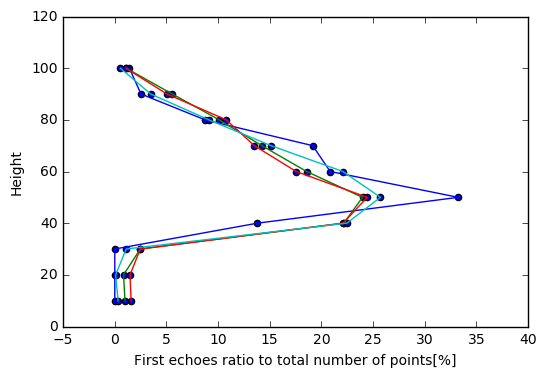

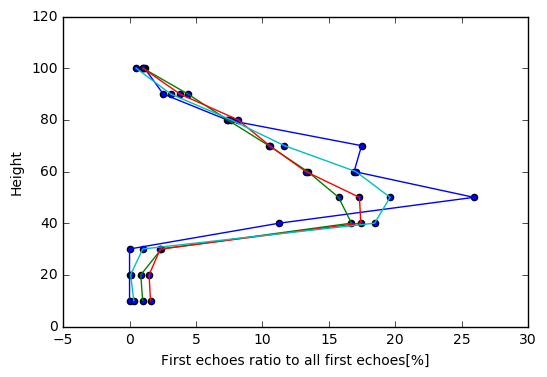

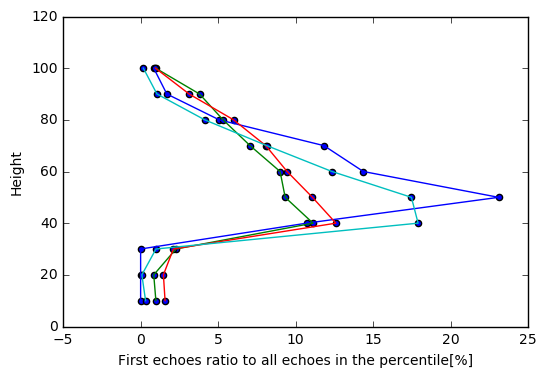

In [9]:
plt.plot(perc_data_mod_y[filename_als].values,perc_data_mod[filename_als].values)
plt.scatter(perc_data_mod_y[filename_als].values,perc_data_mod[filename_als].values)
plt.plot(perc_data_mod_y[filename_tls].values,perc_data_mod[filename_tls].values)
plt.scatter(perc_data_mod_y[filename_tls].values,perc_data_mod[filename_tls].values)
plt.plot(perc_data_mod_y[filename_mls].values,perc_data_mod[filename_mls].values)
plt.scatter(perc_data_mod_y[filename_mls].values,perc_data_mod[filename_mls].values)
plt.plot(perc_data_mod_y[filename_uls].values,perc_data_mod[filename_uls].values)
plt.scatter(perc_data_mod_y[filename_uls].values,perc_data_mod[filename_uls].values)

plt.xlabel('First echoes ratio to total number of points[%]')
plt.ylabel('Height')
plt.show()

plt.plot(perc_data_mod_y2[filename_als].values,perc_data_mod[filename_als].values)
plt.scatter(perc_data_mod_y2[filename_als].values,perc_data_mod[filename_als].values)
plt.plot(perc_data_mod_y2[filename_tls].values,perc_data_mod[filename_tls].values)
plt.scatter(perc_data_mod_y2[filename_tls].values,perc_data_mod[filename_tls].values)
plt.plot(perc_data_mod_y2[filename_mls].values,perc_data_mod[filename_mls].values)
plt.scatter(perc_data_mod_y2[filename_mls].values,perc_data_mod[filename_mls].values)
plt.plot(perc_data_mod_y2[filename_uls].values,perc_data_mod[filename_uls].values)
plt.scatter(perc_data_mod_y2[filename_uls].values,perc_data_mod[filename_uls].values)

plt.xlabel('First echoes ratio to all first echoes[%]')
plt.ylabel('Height')
plt.show()

plt.plot(perc_data_mod_y3[filename_als].values,perc_data_mod[filename_als].values)
plt.scatter(perc_data_mod_y3[filename_als].values,perc_data_mod[filename_als].values)
plt.plot(perc_data_mod_y3[filename_tls].values,perc_data_mod[filename_tls].values)
plt.scatter(perc_data_mod_y3[filename_tls].values,perc_data_mod[filename_tls].values)
plt.plot(perc_data_mod_y3[filename_mls].values,perc_data_mod[filename_mls].values)
plt.scatter(perc_data_mod_y3[filename_mls].values,perc_data_mod[filename_mls].values)
plt.plot(perc_data_mod_y3[filename_uls].values,perc_data_mod[filename_uls].values)
plt.scatter(perc_data_mod_y3[filename_uls].values,perc_data_mod[filename_uls].values)


plt.xlabel('First echoes ratio to all echoes in the percentile[%]')
plt.ylabel('Height')
plt.show()

Combine above two figures together

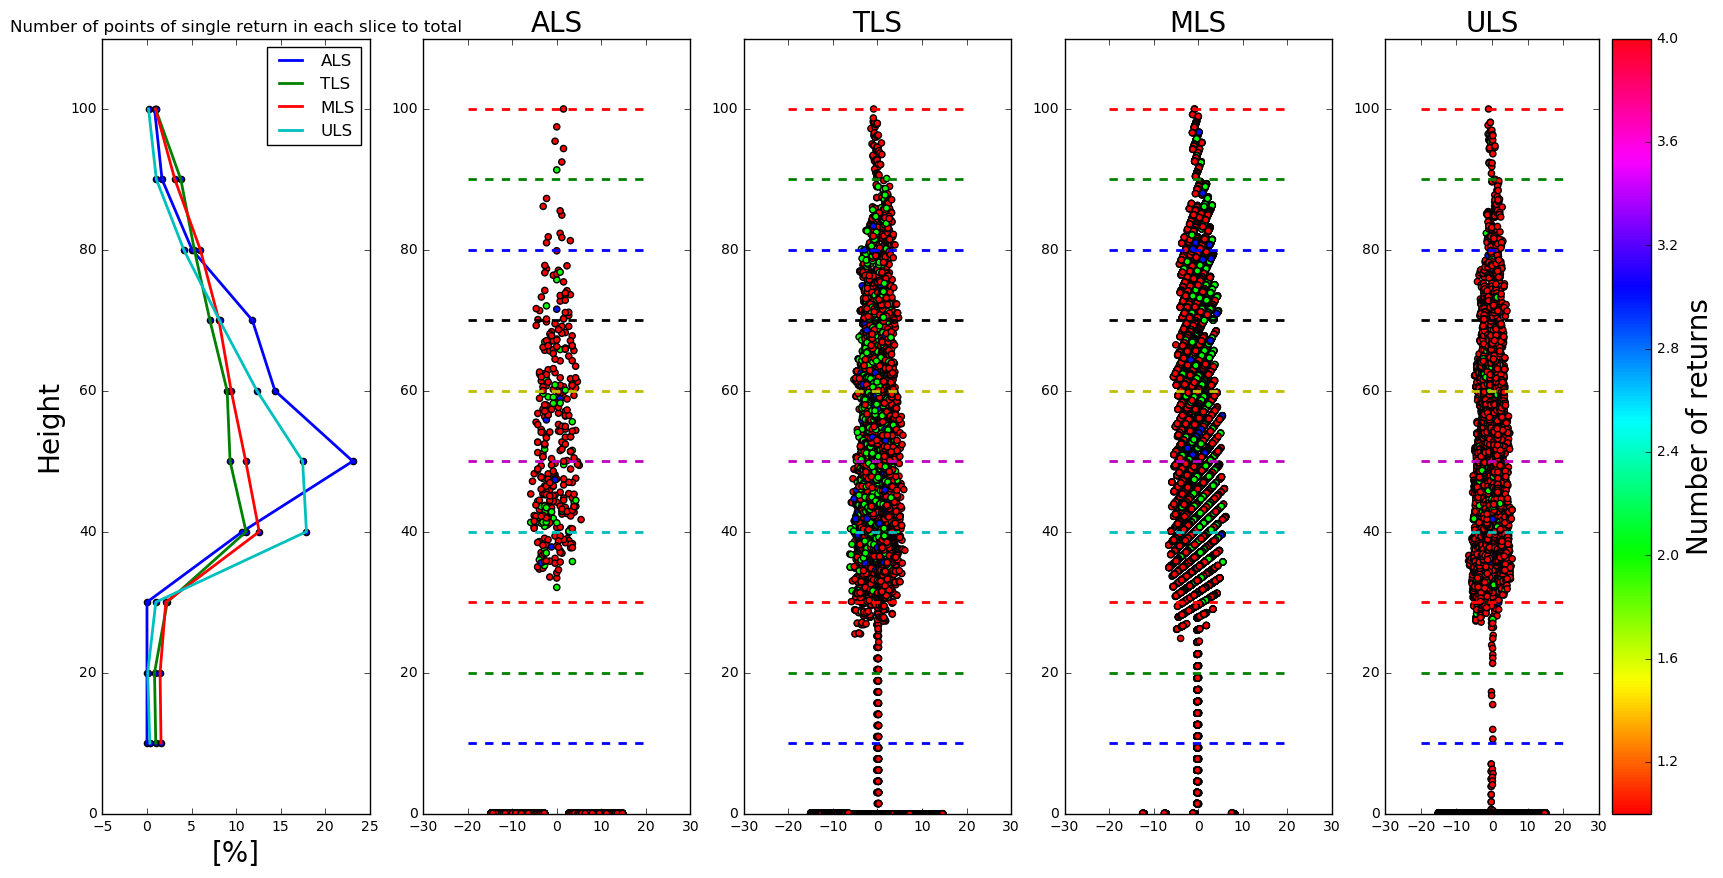

In [10]:
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

ax0.plot(perc_data_mod_y3[filename_als].values,perc_data_mod[filename_als].values,linewidth=2,label='ALS')
ax0.scatter(perc_data_mod_y3[filename_als].values,perc_data_mod[filename_als].values)
ax0.plot(perc_data_mod_y3[filename_tls].values,perc_data_mod[filename_tls].values,linewidth=2,label='TLS')
ax0.scatter(perc_data_mod_y3[filename_tls].values,perc_data_mod[filename_tls].values)
ax0.plot(perc_data_mod_y3[filename_mls].values,perc_data_mod[filename_mls].values,linewidth=2,label='MLS')
ax0.scatter(perc_data_mod_y3[filename_mls].values,perc_data_mod[filename_mls].values)
ax0.plot(perc_data_mod_y3[filename_uls].values,perc_data_mod[filename_uls].values,linewidth=2,label='ULS')
ax0.scatter(perc_data_mod_y3[filename_uls].values,perc_data_mod[filename_uls].values)

ax0.set_ylabel('Height',fontsize=20)
ax0.set_xlabel('[%]',fontsize=20)

ax1.scatter(als_data['x'].values,als_data['NormalizedZ_perc'].values, 
            c=als_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax1.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_als].values,perc_data_mod[filename_als].values),'--',linewidth=2)

ax2.scatter(tls_data['x'].values,tls_data['NormalizedZ_perc'].values, 
            c=tls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax2.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_tls].values,perc_data_mod[filename_tls].values),'--',linewidth=2)

ax3.scatter(mls_data['x'].values,mls_data['NormalizedZ_perc'].values, 
            c=mls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax3.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_mls].values,perc_data_mod[filename_mls].values),'--',linewidth=2)

ax4.scatter(uls_data['x'].values,uls_data['NormalizedZ_perc'].values, 
            c=uls_data['returnNumber'].values,vmin=1, vmax=4,cmap=cm.hsv)
ax4.plot(([-20,-20,-20,-20,-20,-20,-20,-20,-20,-20],[20,20,20,20,20,20,20,20,20,20]),(perc_data_mod[filename_uls].values,perc_data_mod[filename_uls].values),'--',linewidth=2)

m = cm.ScalarMappable(cmap=cm.hsv)
m.set_array([1,4])
cbar = plt.colorbar(m)
cbar.set_label('Number of returns',fontsize=20)

ax0.set_title('Number of points of single return in each slice to total')
ax1.set_title('ALS',fontsize=20)
ax2.set_title('TLS',fontsize=20)
ax3.set_title('MLS',fontsize=20)
ax4.set_title('ULS',fontsize=20)

ax0.set_ylim([0,110])
ax1.set_ylim([0,110])
ax2.set_ylim([0,110])
ax3.set_ylim([0,110])
ax4.set_ylim([0,110])

ax0.legend(loc=0)

plt.show()

Behaviour of crown width polygon

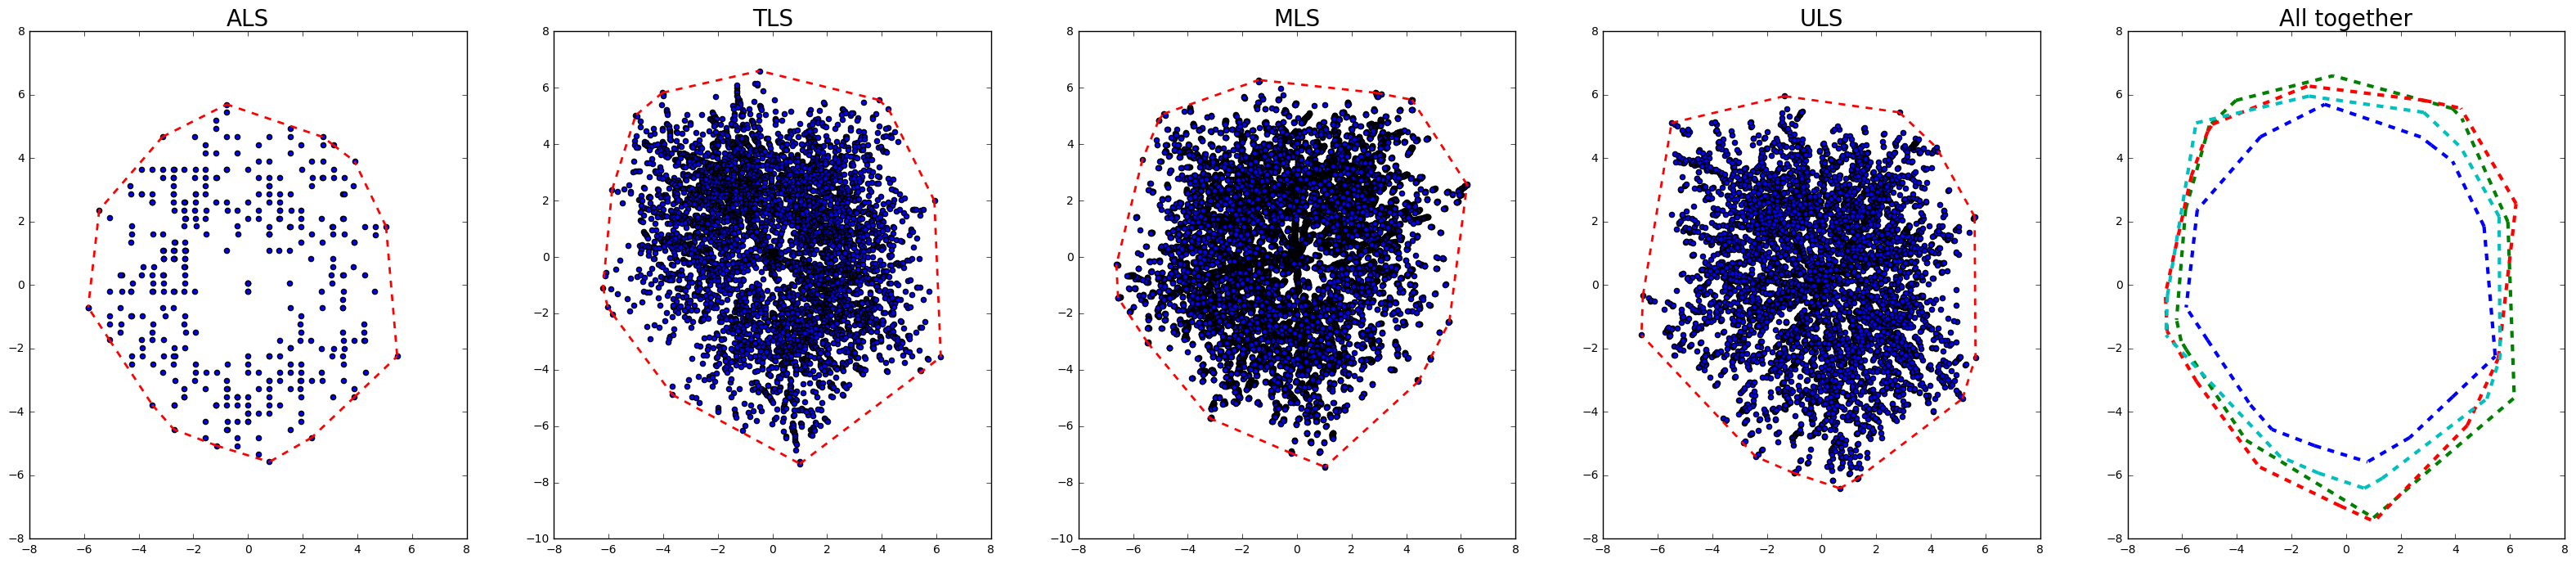

In [40]:
CB=20

def crown_fea(nonground_als_data,CB):
    from scipy.spatial import ConvexHull
    
    crown=nonground_als_data[(nonground_als_data['NormalizedZ_perc']>CB)]
    c_length=np.max(crown['NormalizedZ_perc'])-CB
    hull = ConvexHull(crown[['x','y']].values)
    x=crown['x'].values
    y=crown['y'].values
    
    c_width=np.sqrt(((np.max(x[hull.vertices])-np.min(x[hull.vertices]))**2)+((np.max(y[hull.vertices])-np.min(y[hull.vertices]))**2))
    
    return c_length,c_width,c_length/c_width,hull.vertices,hull.simplices,crown

c_length_als,c_width_als,ratio_length_width_als,vertices_als,simplices_als,crown_als=crown_fea(nonground_als_data,CB)
c_length_tls,c_width_tls,ratio_length_width_tls,vertices_tls,simplices_tls,crown_tls=crown_fea(nonground_tls_data[(nonground_tls_data['returnNumber']<3)],CB)
c_length_mls,c_width_mls,ratio_length_width_mls,vertices_mls,simplices_mls,crown_mls=crown_fea(nonground_mls_data[(nonground_mls_data['returnNumber']<3)],CB)
c_length_uls,c_width_uls,ratio_length_width_uls,vertices_uls,simplices_uls,crown_uls=crown_fea(nonground_uls_data,CB)

x_als=crown_als['x'].values
y_als=crown_als['y'].values
x_tls=crown_tls['x'].values
y_tls=crown_tls['y'].values
x_mls=crown_mls['x'].values
y_mls=crown_mls['y'].values
x_uls=crown_uls['x'].values
y_uls=crown_uls['y'].values

fig = plt.figure(figsize=(40,8))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

for simplex_als in simplices_als:
    ax0.plot(x_als[simplex_als], y_als[simplex_als], 'r--',lw=2)
ax0.scatter(x_als,y_als)

for simplex_tls in simplices_tls:
    ax1.plot(x_tls[simplex_tls], y_tls[simplex_tls], 'r--',lw=2)
ax1.scatter(x_tls,y_tls)

for simplex_mls in simplices_mls:
    ax2.plot(x_mls[simplex_mls], y_mls[simplex_mls], 'r--',lw=2)
ax2.scatter(x_mls,y_mls)

for simplex_uls in simplices_uls:
    ax3.plot(x_uls[simplex_uls], y_uls[simplex_uls], 'r--',lw=2)
ax3.scatter(x_uls,y_uls)

for simplex_als in simplices_als:
    ax4.plot(x_als[simplex_als], y_als[simplex_als],'b--',lw=3)

for simplex_tls in simplices_tls:
    ax4.plot(x_tls[simplex_tls], y_tls[simplex_tls],'g--',lw=3)

for simplex_mls in simplices_mls:
    ax4.plot(x_mls[simplex_mls], y_mls[simplex_mls],'r--',lw=3)

for simplex_uls in simplices_uls:
    ax4.plot(x_uls[simplex_uls], y_uls[simplex_uls],'c--',lw=3)
    
ax0.set_title('ALS',fontsize=20)
ax1.set_title('TLS',fontsize=20)
ax2.set_title('MLS',fontsize=20)
ax3.set_title('ULS',fontsize=20)
ax4.set_title('All together',fontsize=20)

plt.show()
    